# Outline

1. Problemstellung 

Kreditwürdigkeit von Kunden anhand des Kostenmodells der Bank vorhersagen

Task (T): Kreditwürdigkeit eines Kunden basierend auf verschiedenen Features klassifizieren. 
Experience (E): Kundendatensatz: 1000 Kunden
Performance (P): Accuracy der Klassifizierung der Kreditwürdigkeit


Überwachtes Lernproblem, da Daten Werte für vorherzusagende Variable enthalten.

Classification / Regression?
Es ist ein Klassifizierungsproblem, da wir die Kreditwürdigkeit in Ja oder Nein bzw Gut oder schlecht bewerten. 

# Daten einlesen und Data exploration 

In [887]:
import pandas as pd
import sklearn
import matplotlib
import numpy
import scipy
import os 
from pandas import read_csv
            
            
# Daten einlesen            
df = pd.read_table('/Users/nelesassor/Downloads/kredit (3).dat')
df.columns = ['StatusOfExistingCheckingAccount', 'DurationInMonth', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingsAccountBonds', 'PresentEmploymentSince', 'InstallmentRateInPercentageOfDisposableIncome', 'PersonalStatusAndSex', 'OtherDebtorsGuarantors', 'PresentResidenceSince', 'Property', 'AgeInYears', 'OtherInstallmentPlans', 'Housing', 'NumberOfExistingCreditsAtThisBank', 'Job', 'NumberOfPeopleBeingLiableToProvideMaintenanceFor', 'Telephone', 'ForeignWorker', 'Creditworthy']

daten = pd.DataFrame(df)
daten_string = daten 
# Data exploration

print(daten.head())
print(daten.tail())

print(daten.shape)
daten.describe()



  StatusOfExistingCheckingAccount  DurationInMonth CreditHistory Purpose  \
0                             A12               18           A32     A46   
1                             A13               24           A32     A40   
2                             A14               15           A33     A43   
3                             A14               24           A32     A40   
4                             A12               24           A34     A40   

   CreditAmount SavingsAccountBonds PresentEmploymentSince  \
0          1239                 A65                    A73   
1           947                 A61                    A74   
2          1478                 A61                    A73   
3          1525                 A64                    A74   
4          3878                 A62                      ?   

   InstallmentRateInPercentageOfDisposableIncome PersonalStatusAndSex  \
0                                              4                  A93   
1                       

,DurationInMonth,CreditAmount,InstallmentRateInPercentageOfDisposableIncome,PresentResidenceSince,AgeInYears,NumberOfExistingCreditsAtThisBank,NumberOfPeopleBeingLiableToProvideMaintenanceFor,Creditworthy
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.887888,3272.231231,2.971972,2.843844,35.542543,1.407407,1.155155,1.300300
std,12.055377,2823.982853,1.118802,1.103665,11.380641,0.577800,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Dependent Variable: Kreditworthy 

Independent Variables: DurationInMonth, CreditAmount, InstallmentRateInPercentageOfDisposableIncome, 
            PresentResidenceSince, AgeInYears, NumberOfExistingCreditsAtThisBank, NumberOfPeopleBeingLiableToProvideMaintenaceFor,
            Creditworthy
            
Alle kategorischen Daten im Datensatz sind diskret. 


Persönliche Daten: Geschlecht, Alter, Wohnort seit
Berufliche Daten: Jobart, Angestellt seit., Einkommenslevel
Kreditdaten: Dauer vom Kredit, Zweck des Kredits, Höhe des Kredits
Persönliche Finanzen: Einkommenslevel, Ersparnisse Sparkonto, Guthaben Girokonto



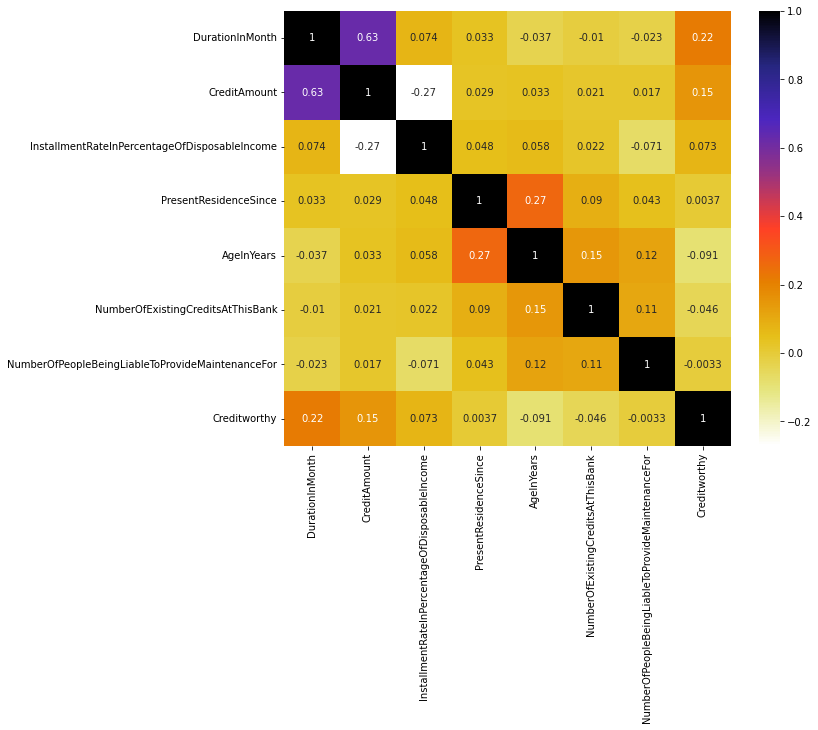

In [993]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
corrmat = daten.corr()
sns.heatmap(corrmat, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Creditworthy
1    699
2    300
Name: Creditworthy, dtype: int64


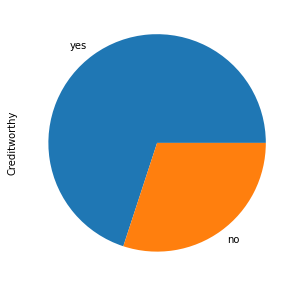

In [994]:
target_count = daten.groupby('Creditworthy')['Creditworthy'].count()
print(target_count)
labels = 'yes', 'no'

target_count.plot.pie(figsize=(5, 5), labels=labels);


# Data Cleaning

In [995]:
# Data cleaning
# Duplikate
print("nun auf Dupliakte prüfen")
daten[daten.duplicated()]
# '?' ersetzen
daten_cleaned = daten.replace(['?'], numpy.nan)
daten_test = daten_cleaned
# Ergebnis Creditworthy zu 0 und 1 ändern
daten_cleaned.Creditworthy.replace([1,2], [1,0], inplace=True)
print(daten_cleaned.head(30))

nun auf Dupliakte prüfen
   StatusOfExistingCheckingAccount  DurationInMonth CreditHistory Purpose  \
0                              A12               18           A32     A46   
1                              A13               24           A32     A40   
2                              A14               15           A33     A43   
3                              A14               24           A32     A40   
4                              A12               24           A34     A40   
5                              A14               24           A32     A41   
6                              A11               21           A33     A46   
7                              A11               24           A34     A41   
8                              A12               18           A32     NaN   
9                              A11               12           A34     A40   
10                             A14               10           A32     NaN   
11                             A12               54

Normalisierung (min,max): def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min()) 
    
 Skaliert Werte zwischen [0, 1] oder [-1, 1].	
 Es ist nützlich, wenn wir nichts über die Verteilung wissen

Standardisierung: X_neu = (X - Mittelwert)/Std
Zur Skalierung werden Mittelwert und Standardabweichung verwendet.
Sie ist nicht auf einen bestimmten Bereich beschränkt.
Es ist viel weniger von Ausreißern betroffen.

In [996]:
# features in kontinuierliche Werte transformieren
# numeric feature labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler


numfeatures = ['DurationInMonth', 'CreditAmount', 'InstallmentRateInPercentageOfDisposableIncome', 'PresentResidenceSince', 'AgeInYears', 
           'NumberOfExistingCreditsAtThisBank', 'NumberOfPeopleBeingLiableToProvideMaintenanceFor', 'Creditworthy']



# Standardization
numfeatures_std = pd.DataFrame(StandardScaler().fit_transform(daten_cleaned[numfeatures].drop(['Creditworthy'], axis=1)))

# normalization 
scaler = MinMaxScaler()

numfeatures_normalized = pd.DataFrame(scaler.fit_transform(daten_cleaned[numfeatures].drop(['Creditworthy'], axis=1)))

                                      
                                    
print(numfeatures_std)

print("Min_Max Normalisierung")

print(numfeatures_normalized)
                                 
                                      

            0         1         2         3         4         5         6
0   -0.239672 -0.720348  0.919325  1.048086  2.238029 -0.705454 -0.428543
1    0.258281 -0.823800  0.919325  0.141560  0.216041 -0.705454  2.333487
2   -0.488648 -0.635673  0.919325  0.141560 -0.223521  1.026115 -0.428543
3    0.258281 -0.619022  0.919325  0.141560 -0.135609 -0.705454  2.333487
4    0.258281  0.214616  0.919325 -0.764966  0.128129 -0.705454 -0.428543
..        ...       ...       ...       ...       ...       ...       ...
994  0.009304 -0.602370  0.919325  1.048086  0.040216 -0.705454 -0.428543
995 -1.235577 -0.734874  0.919325  1.048086 -0.047696 -0.705454 -0.428543
996 -0.737624 -0.916623 -0.869196  0.141560 -0.926822 -0.705454 -0.428543
997  0.258281 -0.670039  0.919325 -0.764966 -0.047696 -0.705454 -0.428543
998 -0.737624 -0.726016 -1.763457 -1.671493  0.919342  1.026115 -0.428543

[999 rows x 7 columns]
Min_Max Normalisierung
            0         1         2         3         4         5  

In [997]:
# categorical features 
# one hot encoder (dummy encoding)
cat_variables = ['StatusOfExistingCheckingAccount', 'CreditHistory', 'Purpose', 'SavingsAccountBonds', 'PresentEmploymentSince',
           'PersonalStatusAndSex', 'OtherDebtorsGuarantors', 'Property', 'OtherInstallmentPlans', 'Housing', 'Job', 
           'Telephone', 'ForeignWorker']




In [998]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
feature_array = ohe.fit_transform(daten_cleaned[['StatusOfExistingCheckingAccount', 'CreditHistory', 'Purpose', 'SavingsAccountBonds', 'PresentEmploymentSince',
           'PersonalStatusAndSex', 'OtherDebtorsGuarantors', 'Property', 'OtherInstallmentPlans', 'Housing', 'Job', 
           'Telephone', 'ForeignWorker']])
ohe.categories_

[array(['A11', 'A12', 'A13', 'A14'], dtype=object),
 array(['A30', 'A31', 'A32', 'A33', 'A34'], dtype=object),
 array(['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48',
        'A49', nan], dtype=object),
 array(['A61', 'A62', 'A63', 'A64', 'A65'], dtype=object),
 array(['A71', 'A72', 'A73', 'A74', 'A75', nan], dtype=object),
 array(['A91', 'A92', 'A93', 'A94'], dtype=object),
 array(['A101', 'A102', 'A103'], dtype=object),
 array(['A121', 'A122', 'A123', 'A124'], dtype=object),
 array(['A141', 'A142', 'A143'], dtype=object),
 array(['A151', 'A152', 'A153'], dtype=object),
 array(['A171', 'A172', 'A173', 'A174', nan], dtype=object),
 array(['A191', 'A192'], dtype=object),
 array(['A201', 'A202', nan], dtype=object)]

In [999]:
feature_labels = ohe.categories_
feature_labels = numpy.array(feature_labels, dtype=object)
numpy.array(feature_labels).ravel()

array([array(['A11', 'A12', 'A13', 'A14'], dtype=object),
       array(['A30', 'A31', 'A32', 'A33', 'A34'], dtype=object),
       array(['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48',
              'A49', nan], dtype=object)                                     ,
       array(['A61', 'A62', 'A63', 'A64', 'A65'], dtype=object),
       array(['A71', 'A72', 'A73', 'A74', 'A75', nan], dtype=object),
       array(['A91', 'A92', 'A93', 'A94'], dtype=object),
       array(['A101', 'A102', 'A103'], dtype=object),
       array(['A121', 'A122', 'A123', 'A124'], dtype=object),
       array(['A141', 'A142', 'A143'], dtype=object),
       array(['A151', 'A152', 'A153'], dtype=object),
       array(['A171', 'A172', 'A173', 'A174', nan], dtype=object),
       array(['A191', 'A192'], dtype=object),
       array(['A201', 'A202', nan], dtype=object)], dtype=object)

In [1000]:
#create dummies 

dummies_StatusOfExistingCheckingAccount = pd.get_dummies(daten_cleaned.StatusOfExistingCheckingAccount)
dummies_CreditHistory = pd.get_dummies(daten_cleaned.CreditHistory)
#dummies_Purpose = pd.get_dummies(daten_cleaned.Purpose)
dummies_SavingsAccountBonds = pd.get_dummies(daten_cleaned.SavingsAccountBonds)
#dummies_PresentEmploymentSince = pd.get_dummies(daten_cleaned.PresentEmploymentSince)
dummies_PersonalStatusAndSex = pd.get_dummies(daten_cleaned.PersonalStatusAndSex)
dummies_OtherDebtorsGuarantors = pd.get_dummies(daten_cleaned.OtherDebtorsGuarantors)
dummies_Property = pd.get_dummies(daten_cleaned.Property)
dummies_OtherInstallmentPlans = pd.get_dummies(daten_cleaned.OtherInstallmentPlans)
dummies_Housing = pd.get_dummies(daten_cleaned.Housing)
#dummies_Job = pd.get_dummies(daten_cleaned.Job)
dummies_Telephone = pd.get_dummies(daten_cleaned.Telephone)
#dummies_ForeignWorker = pd.get_dummies(daten_cleaned.ForeignWorker)


In [1001]:
# merge dataframe 

merged = pd.concat([numfeatures_std, dummies_StatusOfExistingCheckingAccount, dummies_CreditHistory,
                   dummies_SavingsAccountBonds, dummies_PersonalStatusAndSex, 
                   dummies_OtherDebtorsGuarantors, dummies_Property, dummies_OtherInstallmentPlans, 
                   dummies_Housing, dummies_Telephone ], axis='columns')
print("standardscaler")
print(merged)



#merged_minmaxNormalized = pd.concat([numfeatures_normalized, dummies_StatusOfExistingCheckingAccount, dummies_CreditHistory,
#                   dummies_SavingsAccountBonds, dummies_PersonalStatusAndSex, 
#                   dummies_OtherDebtorsGuarantors, dummies_Property, dummies_OtherInstallmentPlans, 
#                   dummies_Housing, dummies_Telephone ], axis='columns')
print("Minmax Normalisiert")
print(merged_minmaxNormalized)

standardscaler
            0         1         2         3         4         5         6  \
0   -0.239672 -0.720348  0.919325  1.048086  2.238029 -0.705454 -0.428543   
1    0.258281 -0.823800  0.919325  0.141560  0.216041 -0.705454  2.333487   
2   -0.488648 -0.635673  0.919325  0.141560 -0.223521  1.026115 -0.428543   
3    0.258281 -0.619022  0.919325  0.141560 -0.135609 -0.705454  2.333487   
4    0.258281  0.214616  0.919325 -0.764966  0.128129 -0.705454 -0.428543   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.009304 -0.602370  0.919325  1.048086  0.040216 -0.705454 -0.428543   
995 -1.235577 -0.734874  0.919325  1.048086 -0.047696 -0.705454 -0.428543   
996 -0.737624 -0.916623 -0.869196  0.141560 -0.926822 -0.705454 -0.428543   
997  0.258281 -0.670039  0.919325 -0.764966 -0.047696 -0.705454 -0.428543   
998 -0.737624 -0.726016 -1.763457 -1.671493  0.919342  1.026115 -0.428543   

     A11  A12  A13  ...  A123  A124  A141  A142  A143  A151 

In [1002]:
# rename the numerical data columns

merged_renamed = merged.rename(columns= { 0:'DurationInMonth', 1: 'CreditAmount', 2:'InstallmentRateInPercentageOfDisposableIncome', 3:'PresentResidenceSince', 4:'AgeInYears', 
           5:'NumberOfExistingCreditsAtThisBank',6: 'NumberOfPeopleBeingLiableToProvideMaintenanceFor'})



In [1003]:
# y wert -> creditworthy zu neuem df hinzufügen 
merged_withCreditworthy = pd.concat([merged_renamed, daten_cleaned['Creditworthy']], axis= 1)
merged_withCreditworthy
merged_withCreditworthy.head()

,DurationInMonth,CreditAmount,InstallmentRateInPercentageOfDisposableIncome,PresentResidenceSince,AgeInYears,NumberOfExistingCreditsAtThisBank,NumberOfPeopleBeingLiableToProvideMaintenanceFor,A11,A12,A13,...,A124,A141,A142,A143,A151,A152,A153,A191,A192,Creditworthy
0,-0.239672,-0.720348,0.919325,1.048086,2.238029,-0.705454,-0.428543,0,1,0,...,1,0,0,1,0,0,1,1,0,1
1,0.258281,-0.823800,0.919325,0.141560,0.216041,-0.705454,2.333487,0,0,1,...,1,1,0,0,0,0,1,1,0,0
2,-0.488648,-0.635673,0.919325,0.141560,-0.223521,1.026115,-0.428543,0,0,0,...,0,1,0,0,0,1,0,1,0,1
3,0.258281,-0.619022,0.919325,0.141560,-0.135609,-0.705454,2.333487,0,0,0,...,0,0,0,1,0,1,0,0,1,1
4,0.258281,0.214616,0.919325,-0.764966,0.128129,-0.705454,-0.428543,0,1,0,...,0,0,0,1,0,1,0,0,1,1


In [1004]:
# use labelencoding on purpose, present employment, job and foreign worker 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
daten_test["Purpose"] = label_encoder.fit_transform(daten_test["Purpose"])
daten_test["PresentEmploymentSince"] = label_encoder.fit_transform(daten_test["PresentEmploymentSince"])
daten_test["Job"] = label_encoder.fit_transform(daten_test["Job"])
daten_test["ForeignWorker"] = label_encoder.fit_transform(daten_test["ForeignWorker"])
daten_test["PresentEmploymentSince"]
daten_test.head(10)

,StatusOfExistingCheckingAccount,DurationInMonth,CreditHistory,Purpose,CreditAmount,SavingsAccountBonds,PresentEmploymentSince,InstallmentRateInPercentageOfDisposableIncome,PersonalStatusAndSex,OtherDebtorsGuarantors,...,Property,AgeInYears,OtherInstallmentPlans,Housing,NumberOfExistingCreditsAtThisBank,Job,NumberOfPeopleBeingLiableToProvideMaintenanceFor,Telephone,ForeignWorker,Creditworthy
0,A12,18,A32,7,1239,A65,2,4,A93,A101,...,A124,61,A143,A153,1,4,1,A191,0,1
1,A13,24,A32,0,947,A61,3,4,A93,A101,...,A124,38,A141,A153,1,4,2,A191,2,0
2,A14,15,A33,4,1478,A61,2,4,A94,A101,...,A121,33,A141,A152,2,2,1,A191,0,1
3,A14,24,A32,0,1525,A64,3,4,A92,A101,...,A123,34,A143,A152,1,2,2,A192,0,1
4,A12,24,A34,0,3878,A62,5,4,A91,A101,...,A123,37,A143,A152,1,4,1,A192,0,1
5,A14,24,A32,1,6313,A65,4,3,A93,A101,...,A123,41,A143,A152,1,3,2,A192,0,1
6,A11,21,A33,7,3414,A61,5,2,A93,A101,...,A122,26,A143,A152,2,2,1,A191,0,0
7,A11,24,A34,1,6419,A61,5,2,A92,A101,...,A124,44,A143,A153,2,3,2,A192,0,1
8,A12,18,A32,10,1924,A65,1,4,A92,A101,...,A121,27,A143,A151,1,2,1,A191,2,0
9,A11,12,A34,0,4843,A61,4,3,A93,A102,...,A122,43,A143,A151,2,2,1,A192,2,0


In [1005]:
# add labelencoded features to df
merged_withCreditworthy_with_labelEncoded = pd.concat([merged_withCreditworthy, daten_test["Purpose"], daten_test["PresentEmploymentSince"], daten_test["Job"] , daten_test["ForeignWorker"]], axis= 1)
merged_withCreditworthy_with_labelEncoded.head(100)

,DurationInMonth,CreditAmount,InstallmentRateInPercentageOfDisposableIncome,PresentResidenceSince,AgeInYears,NumberOfExistingCreditsAtThisBank,NumberOfPeopleBeingLiableToProvideMaintenanceFor,A11,A12,A13,...,A151,A152,A153,A191,A192,Creditworthy,Purpose,PresentEmploymentSince,Job,ForeignWorker
0,-0.239672,-0.720348,0.919325,1.048086,2.238029,-0.705454,-0.428543,0,1,0,...,0,0,1,1,0,1,7,2,4,0
1,0.258281,-0.823800,0.919325,0.141560,0.216041,-0.705454,2.333487,0,0,1,...,0,0,1,1,0,0,0,3,4,2
2,-0.488648,-0.635673,0.919325,0.141560,-0.223521,1.026115,-0.428543,0,0,0,...,0,1,0,1,0,1,4,2,2,0
3,0.258281,-0.619022,0.919325,0.141560,-0.135609,-0.705454,2.333487,0,0,0,...,0,1,0,0,1,1,0,3,2,0
4,0.258281,0.214616,0.919325,-0.764966,0.128129,-0.705454,-0.428543,0,1,0,...,0,1,0,0,1,1,0,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.239672,-0.366415,-0.869196,-1.671493,-0.926822,1.026115,-0.428543,0,0,0,...,0,1,0,1,0,1,4,2,2,0
96,-0.737624,-0.888988,0.919325,-1.671493,-0.838909,-0.705454,-0.428543,0,0,0,...,0,1,0,0,1,1,10,5,2,2
97,-0.986601,-0.070231,-1.763457,-0.764966,-0.223521,1.026115,2.333487,0,0,0,...,0,1,0,1,0,1,4,5,2,0
98,1.254186,2.756981,0.919325,-0.764966,-0.487259,-0.705454,-0.428543,0,0,0,...,0,1,0,0,1,1,1,2,3,0


Fehlende Werte für Foreign Worker mit Logistic Regression ersetzen

In [1006]:
# – Make missing records as our Testing data. -foreign worker -value = 2 
test_daten_foreignWorker = merged_withCreditworthy_with_labelEncoded[merged_withCreditworthy_with_labelEncoded['ForeignWorker']== 2]
test_daten_foreignWorker.shape
x_test_foreignWorker = test_daten_foreignWorker.drop('ForeignWorker', axis=1)


In [1007]:
# – Make non-missing records as our Training data. foreign woker
train_daten_foreignWorker = merged_withCreditworthy_with_labelEncoded[merged_withCreditworthy_with_labelEncoded['ForeignWorker']!= 2]


In [1008]:
y_train_foreignWorker = train_daten_foreignWorker['ForeignWorker']

x_train_foreignWorker = train_daten_foreignWorker.drop('ForeignWorker', axis=1)
x_train_foreignWorker.shape


(640, 44)

In [1009]:
# build LR Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()


In [1010]:
# train model
log_reg.fit(x_train_foreignWorker, y_train_foreignWorker)

LogisticRegression()

In [1011]:
# apply the model

y_pred_foreignWorker = log_reg.predict(x_test_foreignWorker)
y_pred_foreignWorker


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1012]:
# assign to df
df = pd.DataFrame(y_pred_foreignWorker, columns=['ForeignWorker']) 


In [1013]:
# add values to missing rows / foreignworker 
x_test_foreignWorker_with_results = pd.concat([x_test_foreignWorker, df], axis= 1)

x_test_foreignWorker_with_results.shape
x_test_foreignWorker['ForeignWorker'] = y_pred_foreignWorker
x_test_foreignWorker.shape
x_test_foreignWorker.head(10)

,DurationInMonth,CreditAmount,InstallmentRateInPercentageOfDisposableIncome,PresentResidenceSince,AgeInYears,NumberOfExistingCreditsAtThisBank,NumberOfPeopleBeingLiableToProvideMaintenanceFor,A11,A12,A13,...,A151,A152,A153,A191,A192,Creditworthy,Purpose,PresentEmploymentSince,Job,ForeignWorker
1,0.258281,-0.823800,0.919325,0.141560,0.216041,-0.705454,2.333487,0,0,1,...,0,0,1,1,0,0,0,3,4,0
8,-0.239672,-0.477661,0.919325,0.141560,-0.750997,-0.705454,-0.428543,0,1,0,...,1,0,0,1,0,0,10,1,2,0
9,-0.737624,0.556503,0.025064,1.048086,0.655604,1.026115,-0.428543,1,0,0,...,1,0,0,0,1,0,0,4,2,0
10,-0.903609,-0.477661,-1.763457,1.048086,0.216041,-0.705454,-0.428543,0,0,0,...,0,1,0,0,1,1,10,5,2,0
15,-1.235577,-0.726725,-1.763457,-0.764966,-0.750997,1.026115,-0.428543,0,0,0,...,0,1,0,1,0,1,3,5,2,1
16,2.250091,1.543547,0.919325,-0.764966,0.919342,1.026115,2.333487,0,0,0,...,0,1,0,1,0,1,9,4,3,0
19,-1.235577,-0.788371,-0.869196,1.048086,1.270992,-0.705454,-0.428543,0,0,1,...,0,1,0,1,0,1,7,2,4,0
21,1.503162,-0.249146,0.919325,1.048086,-1.014734,-0.705454,-0.428543,0,0,0,...,0,1,0,1,0,1,1,2,2,0
22,-0.488648,-0.086174,-0.869196,-0.764966,-0.223521,-0.705454,-0.428543,0,0,0,...,0,1,0,1,0,1,1,3,4,0
23,-0.239672,-0.760382,0.919325,-0.764966,-1.278472,-0.705454,-0.428543,0,0,0,...,1,0,0,0,1,1,4,5,2,0


In [1014]:
# concat test and train df
datafrane_testundtrain_foreignWorker = pd.concat([train_daten_foreignWorker, x_test_foreignWorker], axis = 0)
datafrane_testundtrain_foreignWorker.shape

(999, 45)

Fehlende Werte von Purpose, PresentEmploymentSince und Job mit RandomForestClassifier ersetzen

In [1015]:
# random forest model with purpose, presentemployment, job 


In [1016]:
# – Make missing records as our Testing data. -purpose -value = 10 
test_daten_purpose = datafrane_testundtrain_foreignWorker[datafrane_testundtrain_foreignWorker['Purpose']== 10]
test_daten_purpose.shape
x_test_purpose = test_daten_purpose.drop('Purpose', axis=1)


In [1017]:
# – Make non-missing records as our Training data.

train_daten_purpose = datafrane_testundtrain_foreignWorker[datafrane_testundtrain_foreignWorker['Purpose']!= 10]
train_daten_purpose.shape

(827, 45)

In [1018]:
y_train_purpose = train_daten_purpose['Purpose']

x_train_purpose = train_daten_purpose.drop('Purpose', axis=1)
x_train_purpose.shape
y_train_purpose.shape

(827,)

In [1019]:
# build the model 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 20)
rf_model.fit(x_train_purpose, y_train_purpose)

RandomForestClassifier(n_estimators=20)

In [1020]:
# check model score
rf_model.score(x_train_purpose, y_train_purpose)

0.9987908101571947

In [1021]:
# apply model 
y_predict_purpose = rf_model.predict(x_test_purpose)

# assign to df
df_purpose = pd.DataFrame(y_predict_purpose, columns=['Purpose']) 
x_test_purpose['Purpose'] = y_predict_purpose


In [1022]:
y_predict_purpose

array([7, 0, 0, 0, 0, 0, 0, 3, 0, 4, 9, 3, 4, 4, 3, 4, 1, 0, 0, 3, 3, 0,
       0, 4, 4, 9, 9, 0, 1, 0, 1, 0, 4, 3, 4, 3, 3, 3, 4, 0, 3, 4, 0, 4,
       0, 3, 4, 0, 4, 4, 0, 4, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 1, 0, 0, 0,
       0, 3, 9, 9, 0, 4, 0, 0, 4, 4, 4, 4, 3, 4, 9, 4, 3, 3, 3, 3, 4, 3,
       9, 0, 4, 0, 4, 0, 4, 1, 3, 4, 4, 3, 1, 1, 0, 0, 0, 3, 0, 3, 3, 4,
       1, 9, 1, 3, 4, 3, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 1, 9, 4, 4, 4,
       0, 3, 4, 3, 0, 1, 0, 3, 3, 4, 3, 3, 4, 1, 1, 7, 4, 0, 0, 0, 1, 7,
       0, 4, 4, 4, 0, 4, 4, 3, 3, 0, 4, 3, 4, 3, 4, 0, 4, 0])

In [1023]:
# concat test and train df
datafrane_testundtrain_foreignWorker_purpose = pd.concat([train_daten_purpose, x_test_purpose], axis = 0)
datafrane_testundtrain_foreignWorker_purpose.shape
datafrane_testundtrain_foreignWorker_purpose.head(10)

,DurationInMonth,CreditAmount,InstallmentRateInPercentageOfDisposableIncome,PresentResidenceSince,AgeInYears,NumberOfExistingCreditsAtThisBank,NumberOfPeopleBeingLiableToProvideMaintenanceFor,A11,A12,A13,...,A151,A152,A153,A191,A192,Creditworthy,Purpose,PresentEmploymentSince,Job,ForeignWorker
0,-0.239672,-0.720348,0.919325,1.048086,2.238029,-0.705454,-0.428543,0,1,0,...,0,0,1,1,0,1,7,2,4,0
2,-0.488648,-0.635673,0.919325,0.141560,-0.223521,1.026115,-0.428543,0,0,0,...,0,1,0,1,0,1,4,2,2,0
3,0.258281,-0.619022,0.919325,0.141560,-0.135609,-0.705454,2.333487,0,0,0,...,0,1,0,0,1,1,0,3,2,0
4,0.258281,0.214616,0.919325,-0.764966,0.128129,-0.705454,-0.428543,0,1,0,...,0,1,0,0,1,1,0,5,4,0
5,0.258281,1.077305,0.025064,1.048086,0.479779,-0.705454,2.333487,0,0,0,...,0,1,0,0,1,1,1,4,3,0
6,0.009304,0.050227,-0.869196,-1.671493,-0.838909,1.026115,-0.428543,1,0,0,...,0,1,0,1,0,0,7,5,2,0
7,0.258281,1.114860,-0.869196,1.048086,0.743516,1.026115,2.333487,1,0,0,...,0,0,1,0,1,1,1,5,3,0
12,-1.235577,-1.031058,0.919325,1.048086,1.446817,1.026115,-0.428543,0,0,0,...,0,1,0,1,0,1,0,2,1,0
14,-0.239672,0.363062,0.919325,0.141560,0.391866,-0.705454,-0.428543,0,1,0,...,0,1,0,0,1,0,3,4,3,0
17,-0.737624,-0.845411,0.919325,-0.764966,-1.278472,-0.705454,-0.428543,0,0,0,...,0,1,0,1,0,1,4,5,2,0


In [1024]:
# do random forest model for missing values for Present employment since (incomplete)
# – Make missing records as our Testing data. -Present employment since -value = 5
test_daten_PresentEmploymentSince = datafrane_testundtrain_foreignWorker_purpose[datafrane_testundtrain_foreignWorker_purpose['PresentEmploymentSince']== 5]
test_daten_PresentEmploymentSince.shape
x_test_PresentEmploymentSince = test_daten_PresentEmploymentSince.drop('PresentEmploymentSince', axis=1)


In [1025]:
# – Make non-missing records as our Training data.

train_daten_PresentEmploymentSince = datafrane_testundtrain_foreignWorker_purpose[datafrane_testundtrain_foreignWorker_purpose['PresentEmploymentSince']!= 5]
train_daten_PresentEmploymentSince.shape



(504, 45)

In [1026]:
y_train_PresentEmploymentSince = train_daten_PresentEmploymentSince['PresentEmploymentSince']

x_train_PresentEmploymentSince = train_daten_PresentEmploymentSince.drop('PresentEmploymentSince', axis=1)
#print(x_train_PresentEmploymentSince.head(10))
x_train_PresentEmploymentSince.shape

(504, 44)

In [1027]:
# build the model 
from sklearn.ensemble import RandomForestClassifier
rf_model_PresentEmploymentSince = RandomForestClassifier(n_estimators = 10)
rf_model_PresentEmploymentSince.fit(x_train_PresentEmploymentSince, y_train_PresentEmploymentSince)

RandomForestClassifier(n_estimators=10)

In [1028]:
# check model score
rf_model_PresentEmploymentSince.score(x_train_PresentEmploymentSince, y_train_PresentEmploymentSince)

0.9880952380952381

In [1029]:
# apply model 
y_predict_PresentEmploymentSince = rf_model_PresentEmploymentSince.predict(x_test_PresentEmploymentSince)
print(y_predict_PresentEmploymentSince)
# assign to df
#x_test_PresentEmploymentSince['PresentEmploymentSince'] = y_predict_PresentEmploymentSince
x_test_PresentEmploymentSince['PresentEmploymentSince'] = y_predict_PresentEmploymentSince


[2 2 4 1 3 2 2 2 3 2 2 2 2 1 1 4 4 4 1 3 4 4 3 3 2 4 4 1 4 3 1 2 2 3 2 2 1
 1 4 1 1 4 4 1 0 2 1 2 4 2 2 2 1 4 4 2 4 2 2 4 2 2 4 4 2 2 3 2 3 2 4 3 2 1
 4 1 4 3 2 4 1 2 1 2 2 4 1 4 4 2 3 4 4 2 2 2 2 2 4 2 1 3 3 2 2 1 1 2 4 4 4
 0 1 3 4 3 1 2 2 4 4 2 2 4 3 4 2 2 2 1 2 3 3 1 0 4 2 4 4 4 4 4 0 2 3 4 2 2
 2 4 2 3 1 2 2 3 2 2 4 1 1 2 1 1 3 2 4 1 4 2 4 3 2 1 2 4 1 4 2 3 1 2 1 4 2
 2 4 1 1 2 2 2 2 4 2 4 1 3 2 2 4 3 2 2 2 4 2 4 4 1 4 4 4 3 4 1 2 1 4 3 4 1
 2 3 1 2 1 2 1 4 2 2 2 4 1 2 3 2 3 0 3 2 1 3 2 4 2 2 2 2 1 3 2 2 2 1 3 2 2
 3 4 2 1 2 2 2 1 3 1 4 1 2 4 4 2 2 2 4 1 4 4 1 2 4 4 2 1 1 4 4 4 2 4 2 2 4
 4 2 2 3 2 3 2 4 2 1 0 2 3 2 3 2 1 3 1 4 4 1 2 4 3 2 2 2 2 2 2 2 1 2 1 2 2
 2 2 4 2 4 3 2 2 4 2 2 2 3 4 4 2 3 2 3 3 3 3 2 1 2 4 4 2 2 2 3 2 3 1 2 1 1
 1 4 1 1 4 3 4 2 2 4 2 2 3 4 4 2 2 2 1 2 2 2 4 1 4 2 2 4 4 1 4 1 2 3 4 3 1
 3 2 2 4 1 2 1 1 2 1 2 4 2 2 2 2 3 2 1 2 1 2 2 1 4 2 0 2 4 3 2 2 4 4 4 1 2
 1 2 2 2 2 2 4 3 2 3 1 2 4 1 2 2 4 2 1 2 4 4 2 2 2 4 2 4 2 2 2 2 3 4 1 4 4
 2 3 0 4 4 2 2 2 2 4 2 2 

In [1030]:
datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince = pd.concat([train_daten_PresentEmploymentSince, x_test_PresentEmploymentSince], axis = 0)
datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince.head(10)


,DurationInMonth,CreditAmount,InstallmentRateInPercentageOfDisposableIncome,PresentResidenceSince,AgeInYears,NumberOfExistingCreditsAtThisBank,NumberOfPeopleBeingLiableToProvideMaintenanceFor,A11,A12,A13,...,A151,A152,A153,A191,A192,Creditworthy,Purpose,PresentEmploymentSince,Job,ForeignWorker
0,-0.239672,-0.720348,0.919325,1.048086,2.238029,-0.705454,-0.428543,0,1,0,...,0,0,1,1,0,1,7,2,4,0
2,-0.488648,-0.635673,0.919325,0.141560,-0.223521,1.026115,-0.428543,0,0,0,...,0,1,0,1,0,1,4,2,2,0
3,0.258281,-0.619022,0.919325,0.141560,-0.135609,-0.705454,2.333487,0,0,0,...,0,1,0,0,1,1,0,3,2,0
5,0.258281,1.077305,0.025064,1.048086,0.479779,-0.705454,2.333487,0,0,0,...,0,1,0,0,1,1,1,4,3,0
12,-1.235577,-1.031058,0.919325,1.048086,1.446817,1.026115,-0.428543,0,0,0,...,0,1,0,1,0,1,0,2,1,0
14,-0.239672,0.363062,0.919325,0.141560,0.391866,-0.705454,-0.428543,0,1,0,...,0,1,0,0,1,0,3,4,3,0
20,0.756233,-0.397592,0.919325,-0.764966,-1.014734,-0.705454,-0.428543,0,1,0,...,0,1,0,1,0,0,0,2,2,0
24,0.258281,-0.245957,-0.869196,-0.764966,-0.135609,-0.705454,-0.428543,0,0,0,...,0,1,0,1,0,1,4,4,2,0
30,0.258281,-0.683148,0.919325,-0.764966,0.128129,1.026115,2.333487,0,0,1,...,0,1,0,1,0,0,0,3,4,0
35,0.092297,-0.211591,0.025064,1.048086,0.391866,-0.705454,-0.428543,0,0,0,...,0,1,0,1,0,1,4,4,2,0


In [1031]:
# same for job 
# – Make missing records as our Testing data. -purpose -value = 10 
test_daten_job = datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince[datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince['Job']== 4]
test_daten_job.shape
x_test_job = test_daten_job.drop('Job', axis=1)


In [1032]:
# – Make non-missing records as our Training data.

train_daten_Job = datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince[datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince['Job']!= 4]
train_daten_Job.shape


(767, 45)

In [1033]:
y_train_job = train_daten_Job['Job']

x_train_job = train_daten_Job.drop('Job', axis=1)
x_train_job.shape

(767, 44)

In [1034]:
# build the model 
from sklearn.ensemble import RandomForestClassifier
rf_model_job = RandomForestClassifier(n_estimators = 20)
rf_model_job.fit(x_train_job, y_train_job)

RandomForestClassifier(n_estimators=20)

In [1035]:
rf_model_job.score(x_train_job, y_train_job)

0.9960886571056062

In [1036]:
# apply model 
y_predict_job = rf_model_job.predict(x_test_job)
#print(y_predict_job)
# assign to df
#x_test_PresentEmploymentSince['PresentEmploymentSince'] = y_predict_PresentEmploymentSince
x_test_job['Job'] = y_predict_job

In [1037]:
datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince_job = pd.concat([train_daten_Job, x_test_job], axis = 0)
datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince_job.head(10)
datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince_job.shape


(999, 45)

# Modelle für Kreditwürdigkeit

In [1041]:
# nun ist der datensatz bereinigt 
# nun kann man vorhersage modelle für kreditwürdigkeit erstellen 


In [1042]:
# split dataset into test, train, validate 

daten_for_creditworhty = datafrane_testundtrain_foreignWorker_purpose_PresentEmploymentSince_job

In [1043]:
from sklearn.model_selection import train_test_split 

train_data, test_data = train_test_split(daten_for_creditworhty, test_size=0.2)
train_data.shape

(799, 45)

In [1044]:
x_test_data_creditworthy = test_data.drop('Creditworthy', axis=1)
y_test_creditworthy = test_data['Creditworthy']

In [1045]:
# create x and y for training data 
y_train_creditworthy = train_data['Creditworthy']

x_train_creditworthy = train_data.drop('Creditworthy', axis=1)
#print(x_train_PresentEmploymentSince.head(10))
x_train_creditworthy.shape

(799, 44)

In [1049]:
#log_reg_credit = LogisticRegression(solver='liblinear', max_iter=100)
log_reg_credit = LogisticRegression()


In [1050]:
# train model
log_reg_credit.fit(x_train_creditworthy, y_train_creditworthy)

LogisticRegression()

In [1051]:
# apply the model

y_pred_creditworthy_log_r = log_reg_credit.predict(x_test_data_creditworthy)
y_pred_creditworthy_log_r

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples


The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.




In [1052]:
from sklearn.metrics import classification_report, confusion_matrix


cm = confusion_matrix(y_test_creditworthy, y_pred_creditworthy_log_r)
print(cm)
print(classification_report(y_test_creditworthy, y_pred_creditworthy_log_r))

[[ 25  36]
 [ 16 123]]
              precision    recall  f1-score   support

           0       0.61      0.41      0.49        61
           1       0.77      0.88      0.83       139

    accuracy                           0.74       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.72      0.74      0.72       200



In [1053]:
from sklearn import tree
decisionTree =tree.DecisionTreeClassifier()
decisionTree.fit(x_train_creditworthy, y_train_creditworthy)



DecisionTreeClassifier()

In [1054]:
y_pred_creditworthy_decision_tree = decisionTree.predict(x_test_data_creditworthy)

cm_decisiont = confusion_matrix(y_test_creditworthy, y_pred_creditworthy_decision_tree)

print(cm_decisiont)
print(classification_report(y_test_creditworthy, y_pred_creditworthy_decision_tree))


[[ 31  30]
 [ 37 102]]
              precision    recall  f1-score   support

           0       0.46      0.51      0.48        61
           1       0.77      0.73      0.75       139

    accuracy                           0.67       200
   macro avg       0.61      0.62      0.62       200
weighted avg       0.68      0.67      0.67       200



In [1055]:
text_representation = tree.export_text(decisionTree)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_0 <= 0.13
|   |   |--- feature_12 <= 0.50
|   |   |   |--- feature_11 <= 0.50
|   |   |   |   |--- feature_1 <= 1.93
|   |   |   |   |   |--- feature_0 <= -1.03
|   |   |   |   |   |   |--- feature_42 <= 2.50
|   |   |   |   |   |   |   |--- feature_4 <= -0.93
|   |   |   |   |   |   |   |   |--- feature_4 <= -1.06
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  -1.06
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_4 >  -0.93
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_42 >  2.50
|   |   |   |   |   |   |   |--- feature_5 <= 0.16
|   |   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  0.16
|   |   |   |   |   |   | 

In [1056]:
# random forest 
randomForest_credit = RandomForestClassifier(n_estimators = 200)
randomForest_credit.fit(x_train_creditworthy, y_train_creditworthy)


RandomForestClassifier(n_estimators=200)

In [1057]:
# apply model 
y_predict_credit_randomForest = randomForest_credit.predict(x_test_data_creditworthy)

In [1058]:
cm_decisiont = confusion_matrix(y_test_creditworthy, y_predict_credit_randomForest)

print(cm_decisiont)
print(classification_report(y_test_creditworthy, y_predict_credit_randomForest))

[[ 18  43]
 [  7 132]]
              precision    recall  f1-score   support

           0       0.72      0.30      0.42        61
           1       0.75      0.95      0.84       139

    accuracy                           0.75       200
   macro avg       0.74      0.62      0.63       200
weighted avg       0.74      0.75      0.71       200



In [1059]:
# svm
from sklearn import svm

svm_credit = svm.SVC()
svm_credit.fit(x_train_creditworthy, y_train_creditworthy)

SVC()

In [1060]:
# apply model svm

y_predict_credit_svm = svm_credit.predict(x_test_data_creditworthy)

In [1061]:
cm_decisiont = confusion_matrix(y_test_creditworthy, y_predict_credit_svm)

print(cm_decisiont)
print(classification_report(y_test_creditworthy, y_predict_credit_svm))

[[ 16  45]
 [  9 130]]
              precision    recall  f1-score   support

           0       0.64      0.26      0.37        61
           1       0.74      0.94      0.83       139

    accuracy                           0.73       200
   macro avg       0.69      0.60      0.60       200
weighted avg       0.71      0.73      0.69       200



In [1062]:
# roc curve and AUC value

In [1063]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [1064]:
# auc score for Randomforest creditworthy 
auc = roc_auc_score(y_test_creditworthy, y_predict_credit_randomForest)
print('AUC: %.3f' % auc)

AUC: 0.622


In [1065]:
# roc curve
fpr, tpr, thresholds = roc_curve(y_test_creditworthy, y_predict_credit_randomForest)

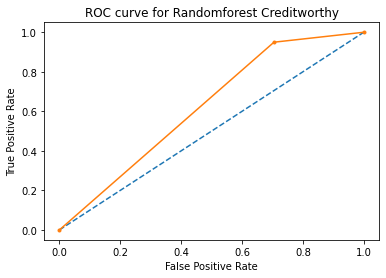

In [1066]:
# plot no rf creditworthy
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Randomforest Creditworthy')
# show the plot
plt.show()


In [1067]:
# auc score for decisiontree creditworthy 
auc_dt = roc_auc_score(y_test_creditworthy, y_pred_creditworthy_decision_tree)
print('AUC: %.3f' % auc_dt)

AUC: 0.621


In [1068]:
# roc curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_creditworthy, y_pred_creditworthy_decision_tree)

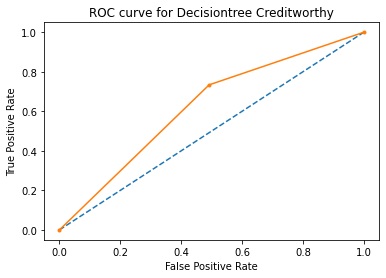

In [1069]:
# plot decisiontree creditworthy
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decisiontree Creditworthy')
# show the plot
plt.show()

In [1070]:
# auc score for log reg creditworthy 
auc_Log_reg = roc_auc_score(y_test_creditworthy, y_pred_creditworthy_log_r)
print('AUC: %.3f' % auc_Log_reg)

AUC: 0.647


In [1071]:
# roc curve
fpr_log, tpr_log, thresholds_log = roc_curve(y_test_creditworthy, y_pred_creditworthy_log_r)

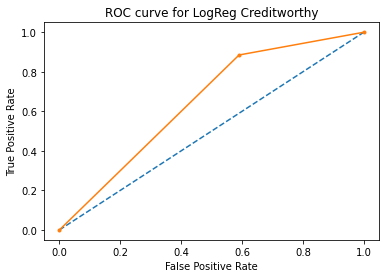

In [1076]:
# plot Logreg creditworthy
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_log, tpr_log, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LogReg Creditworthy')
# show the plot
plt.show()

In [1073]:
# auc score for svm creditworthy 
auc_Log_reg = roc_auc_score(y_test_creditworthy, y_predict_credit_svm)
print('AUC: %.3f' % auc_Log_reg)

AUC: 0.599


In [1074]:
# roc curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_creditworthy, y_predict_credit_svm)

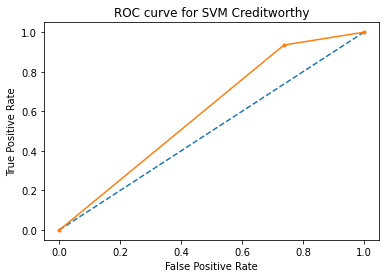

In [1075]:
# plot svm creditworthy
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_svm, tpr_svm, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for SVM Creditworthy')
# show the plot
plt.show()

Die beste Accuracy liefert das Randomforestmodell.
Die höchste AUC liefert die LogisticRegression.